<class 'numpy.ndarray'>
ROC AUC: 0.79


<IPython.core.display.Javascript object>


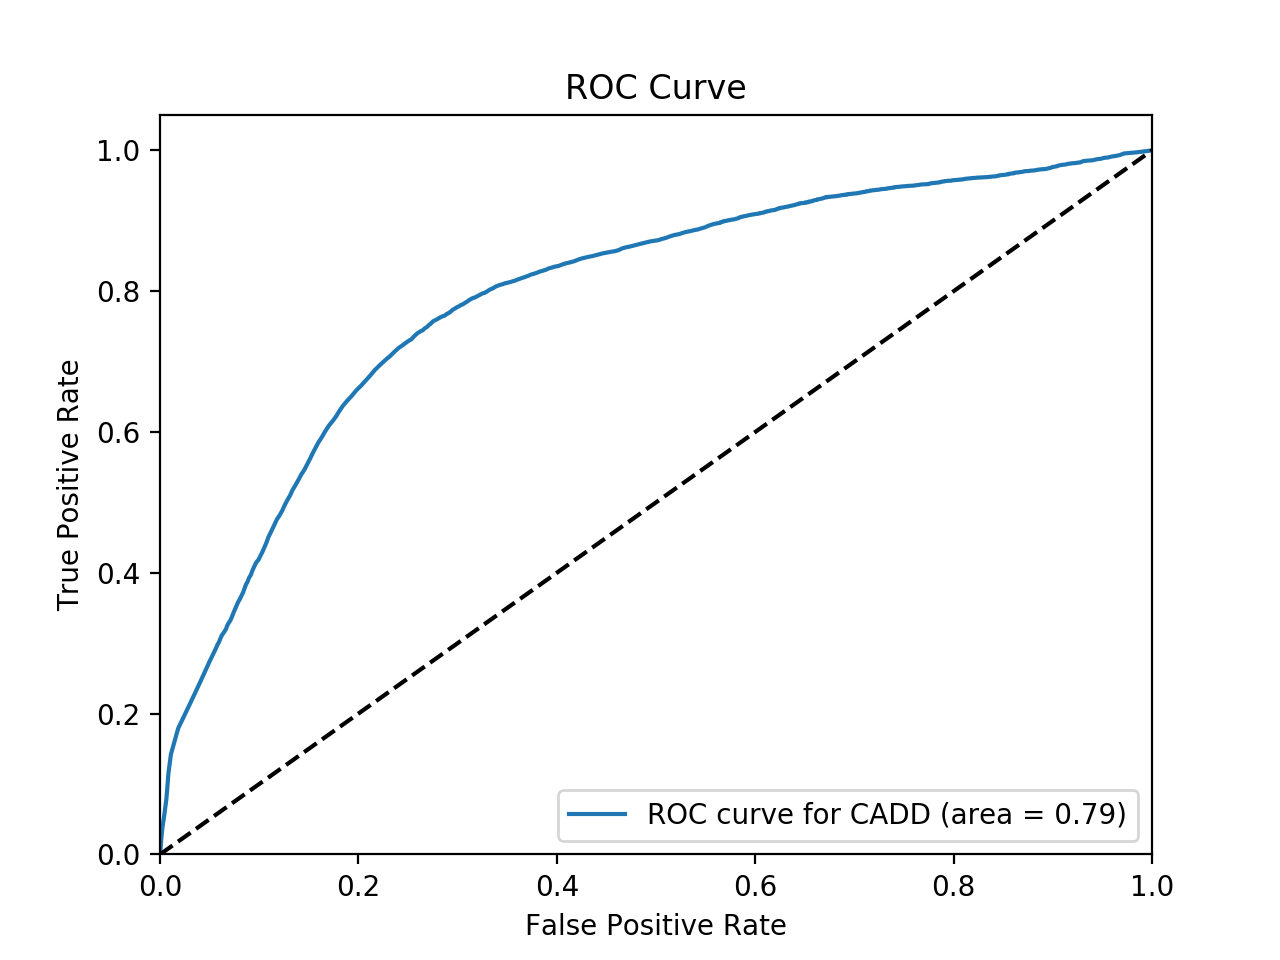

In [31]:
%matplotlib notebook
from pandas import read_csv

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

testPath = './clinvar.annotation.with_dbnsfp_new.dedup.test.norm.one_hot.de_correlated.tsv.gz'

cDataTest = read_csv(testPath, sep='\t', low_memory=False)

testLabels = cDataTest['pathogenic']
caddData = cDataTest['cadd']


yt = np.array([0, 0, 1, 1])
y_true = testLabels.values
y_scores = caddData.values
print(type(y_scores))
roc_auc_score(y_true, y_scores)



# precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve for CADD (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
